In [1]:
import os, shutil

dataset_dir = '/home/xsede4/xsedesummer2019/dogs_cats/'

In [2]:
os.mkdir(os.path.join(dataset_dir,'train'))
os.mkdir(os.path.join(dataset_dir,'validation'))
os.mkdir(os.path.join(dataset_dir,'test'))

In [2]:
train_dir = os.path.join(dataset_dir,'train')
val_dir = os.path.join(dataset_dir,'validation')
test_dir = os.path.join(dataset_dir,'test')

In [3]:
print(train_dir)
print(test_dir)
print(val_dir)

/home/xsede4/xsedesummer2019/dogs_cats/train
/home/xsede4/xsedesummer2019/dogs_cats/test
/home/xsede4/xsedesummer2019/dogs_cats/validation


In [5]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [6]:
val_cats_dir = os.path.join(val_dir,'cats')
os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(val_dir,'dogs')
os.mkdir(val_dogs_dir)

In [7]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [8]:
# select first 1000 cat images for training
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# select next 500 cat images for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# select next 500 cat images for testing
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# select first 1000 dog images for training
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# select next 500 dog images for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# select next 500 dog images for testing
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150,150,3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(), metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(val_dir,target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=6,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
100/100 [==============================] - 30s 301ms/step - loss: 0.7234 - acc: 0.5045 - val_loss: 0.6803 - val_acc: 0.6260
Epoch 2/6
100/100 [==============================] - 31s 306ms/step - loss: 0.7059 - acc: 0.5845 - val_loss: 0.6528 - val_acc: 0.6460
Epoch 3/6
100/100 [==============================] - 36s 361ms/step - loss: 0.6535 - acc: 0.6565 - val_loss: 0.5716 - val_acc: 0.6930
Epoch 4/6
100/100 [==============================] - 36s 363ms/step - loss: 0.5761 - acc: 0.7025 - val_loss: 0.8147 - val_acc: 0.5820
Epoch 5/6
100/100 [==============================] - 35s 348ms/step - loss: 0.6182 - acc: 0.7230 - val_loss: 0.8228 - val_acc: 0.5920
Epoch 6/6
100/100 [==============================] - 32s 322ms/step - loss: 0.5516 - acc: 0.7435 - val_loss: 0.7118 - val_acc: 0.6270


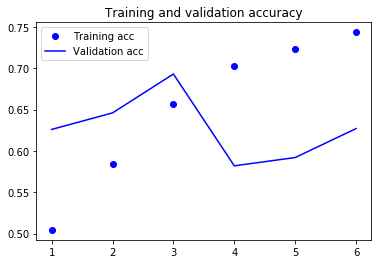

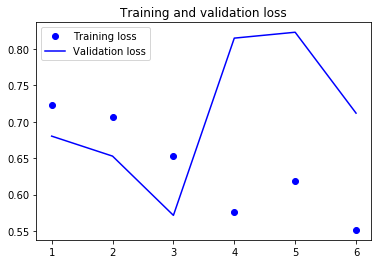

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model.save('dogcat_bad.h5')